<a href="https://colab.research.google.com/github/SijiJ/pytorch/blob/main/node-to-edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx


In [3]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

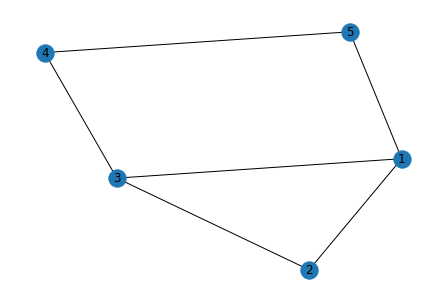

In [4]:
nx.draw(G, with_labels = True)

In [7]:
count=1
for u,v in G.edges():
  print(u,v)
  print(type((u,v)))
  G.edges[u, v]["label"]=count
  #G.edges[u, v]["label2"]=count
  count+=1


1 2
<class 'tuple'>
1 3
<class 'tuple'>
1 5
<class 'tuple'>
2 3
<class 'tuple'>
3 4
<class 'tuple'>
5 4
<class 'tuple'>


In [ ]:
for u,v,a in G.edges(data=True):
  print(u,v,a)
  #print(a['label'])

1 2 {'label': 1}
1 3 {'label': 2}
1 5 {'label': 3}
2 3 {'label': 4}
3 4 {'label': 5}
5 4 {'label': 6}


In [ ]:
count=1
for n in G.nodes():
  print(n)
  G.nodes[n]['label']=count
  count+=1

1
2
3
5
4


In [ ]:
for n,a in G.nodes(data=True):
  print(n,a)

1 {'label': 1}
2 {'label': 2}
3 {'label': 3}
5 {'label': 4}
4 {'label': 5}


[(1, 2)]
[(1, 2), (1, 3)]
[(1, 2), (1, 3), (1, 5)]
[(1, 2), (1, 3), (1, 5), (2, 3)]
[(1, 2), (1, 3), (1, 5), (2, 3), (3, 4)]
[(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (5, 4)]


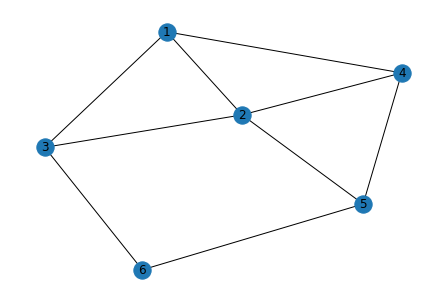

In [11]:
H = nx.Graph()
for u,v,a in G.edges(data=True):
  H.add_node(a['label'])
edges=[]
for u,v,w in G.edges(data=True):
  edges.append((u,v))
  print(edges)
  for e in u,v:
    for a,b,c in G.edges(data=True):
      if (a,b) in edges:
        continue
      if e in (a,b):
        H.add_edge(w['label'], c['label'])
nx.draw(H, with_labels = True)